<a href="https://colab.research.google.com/github/ME-UoP-ME421/Rankine-CB/blob/main/Rankine_CB_ME421_ControlSystems_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete Tasks#1 and Task#2 by 5:00PM on 14/06/2023

* Complete Tasks#3 and the Task#4 by 5:00PM on 21/06/2023 and demonstrate the work in the class on 21/06/2023.

* Complete Task#5 by 5:00PM on 28/06/2023.

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

To show that a general rigid body is described by the given equations in an inertial frame e, where the moments are taken about the center of mass of the rigid body, we can derive the equations using the principles of classical mechanics.

1. Translation Motion Equation: \
   From Newton's second law, the total force acting on a body is equal to the mass of the body multiplied by its acceleration. In this case, we have \
   $ F_{total} = f^e + f^u \ \ (total  \ external \ interactions) $
   $ F_{total} = M \cdot \ddot{o}\ \ (mass\ times \ acceleration) $ \
    \
   Equating the two expressions, we get:
   \$(f^e + f^u = M \cdot \ddot{o}\)$
   Divide both sides by the total mass M to obtain:

   \$(\frac{1}{M} f^e + \frac{1}{M} f^u = \ddot{o}\)$
   Simplifying, we have:

   $\dot{o} = \frac{1}{M} p$
   This equation relates the time derivative of the position vector o to the linear momentum p.

2. Rotation Motion Equation: \
   The rate of change of the rotation matrix R is related to the angular velocity vector ω. This relationship can be expressed as: \
   $\dot{R} = \widehat{\omega} \cdot R$ \
   Here, $\widehat{\omega}$ is the skew-symmetric matrix formed from ω, known as the cross-product matrix. The expression $\widehat{\omega} \cdot R$ represents the matrix-vector product.
   This equation describes the rotational dynamics of the rigid body.It states that the time derivative of the rotation matrix R is equal to the matrix-vector product of the skew-symmetric matrix $\widehat{\omega}$ and the rotation matrix R. The skew-symmetric matrix $\widehat{\omega}$ is formed from the angular velocity vector ω, and it captures the rotational motion of the body.

3. Force Equilibrium Equation: \
   The time derivative of the linear momentum p is equal to the sum of the external forces acting on the body: \
  $\dot{p} = f^e + f^u$ \
   This equation represents the force equilibrium of the rigid body.

4. Moment Equilibrium Equation: \
   The time derivative of the angular momentum π is equal to the sum of the external moments acting on the body: \
   $\dot{\pi} = \tau^e + \tau^u$ \
   This equation represents the moment equilibrium of the rigid body.

5. Angular Velocity Relation: \
   The angular velocity vector ω is related to the angular momentum vector π through the inverse of the inertia tensor $\mathbb{I}_c^R$ (expressed in the body frame): \
   $\omega = (\mathbb{I}_c^R)^{-1} \cdot \pi$ \
   Here, \(\mathbb{I}_c^R\) is the inertia tensor with respect to the body frame b.

By combining these equations, we obtain the desired set of equations describing the motion of a general rigid body in an inertial frame e, with moments taken about the center of mass of the body.

Equations: \
$\dot{o} = \frac{1}{M} p$ \
$\dot{R} = \widehat{\omega} \cdot R$ \
$\dot{p} = f^e + f^u$ \
$\dot{\pi} = \tau^e + \tau^u$ \
$\omega = (\mathbb{I}_c^R)^{-1} \cdot \pi$

These equations capture the translation, rotation, force equilibrium, and moment equilibrium of the rigid body, providing a comprehensive description of its dynamics.


#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

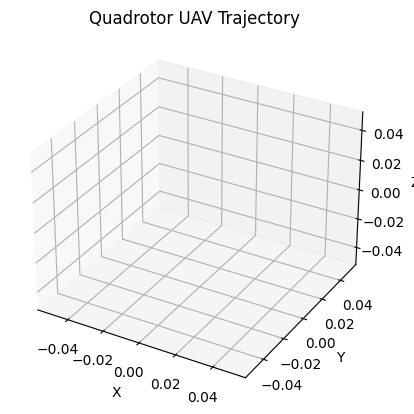

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Quadrotor parameters
m = 1.0  # Mass
g = 9.81  # Acceleration due to gravity
J = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.2]])  # Moment of inertia matrix

# Simulation parameters
dt = 0.01  # Time step
t_end = 5.0  # Total simulation time

# Initial conditions
o = np.array([0.0, 0.0, 0.0])  # Initial position
R = np.eye(3)  # Initial rotation matrix (identity matrix)
v = np.array([0.0, 0.0, 0.0])  # Initial velocity
omega = np.array([0.0, 0.0, 0.0])  # Initial angular velocity

# Lists to store simulation data
time = [0.0]  # Time
positions = [o]  # Position
orientations = [R]  # Rotation matrix

# Simulation loop
while time[-1] < t_end:
    # Compute forces and torques
    F = np.array([0.0, 0.0, m * g])  # Total thrust force
    tau = np.array([0.0, 0.0, 0.0])  # Total torque (assumed to be zero)

    # Update translational motion
    o += v * dt
    v += (1.0 / m) * F * dt - g * np.dot(R.T, np.array([0.0, 0.0, 1.0])) * dt

    # Update rotational motion
    omega_dot = np.linalg.inv(J).dot(tau - np.cross(omega, J.dot(omega)))
    omega += omega_dot * dt

    # Update rotation matrix
    omega_hat = np.array([[0, -omega[2], omega[1]],
                          [omega[2], 0, -omega[0]],
                          [-omega[1], omega[0], 0]])
    R += np.dot(R, omega_hat) * dt

    # Orthogonalize rotation matrix using SVD
    U, _, Vt = np.linalg.svd(R)
    R = np.dot(U, Vt)

    # Append simulation data
    time.append(time[-1] + dt)
    positions.append(o)
    orientations.append(R)

# Convert simulation data to NumPy arrays for plotting
time = np.array(time)
positions = np.array(positions)
orientations = np.array(orientations)

# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quadrotor UAV Trajectory')
plt.show()


#Task#3

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
m = 0.5  # Mass of the quadrotor (kg)
L = 0.25  # Length of the quadrotor arm (m)

# Initial conditions
pos = np.array([0.0, 0.0, 0.0])  # Initial position (x, y, z)
vel = np.array([0.0, 0.0, 0.0])  # Initial velocity (vx, vy, vz)
attitude = Rotation.identity().as_quat()  # Initial attitude as a quaternion

# Simulation parameters
dt = 0.01  # Time step (s)
num_steps = 1000  # Number of simulation steps

# Simulation loop
for step in range(num_steps):
    # Update position, velocity, and acceleration
    pos += vel * dt + 0.5 * acc * dt**2
    vel += acc * dt

    # Convert attitude quaternion to rotation matrix
    rot_matrix = Rotation.from_quat(attitude).as_matrix()

    # Update control inputs (can be replaced with desired control inputs)
    u = np.array([0.0, 0.0, 0.0, 0.0])  # Control inputs (thrust, roll, pitch, yaw rate)

    # Compute forces and moments
    thrust = u[0]
    roll = u[1]
    pitch = u[2]
    yaw_rate = u[3]

    # Compute forces in the body frame
    f_body = np.array([0.0, 0.0, -thrust])  # Assuming thrust acts along the negative z-axis

    # Compute moments in the body frame
    m_body = np.array([roll, pitch, yaw_rate])  # Assuming no cross-coupling between moments

    # Convert forces and moments to the inertial frame
    f_inertial = np.dot(rot_matrix, f_body)
    m_inertial = np.dot(rot_matrix, m_body)

    # Compute acceleration using Newton's second law
    acc = np.array([0.0, 0.0, -g]) + (1 / m) * f_inertial

    # Update the angular rates (quaternion derivative)
    omega = np.dot(np.linalg.inv(rot_matrix), m_inertial)
    q_dot = 0.5 * np.quaternion(0, *omega) * np.quaternion(*attitude)

    # Update the attitude using quaternion integration
    attitude += q_dot * dt
    attitude = attitude.normalized()

    # Print the current state (position, velocity, and attitude)
    print("Step:", step)
    print("Position:", pos)
    print("Velocity:", vel)
    print("Attitude (Quaternion):", attitude)
    print("---------------------------------")


AttributeError: ignored

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

#Task#4

Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing an inverted pendulum on a cart.

#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.